![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

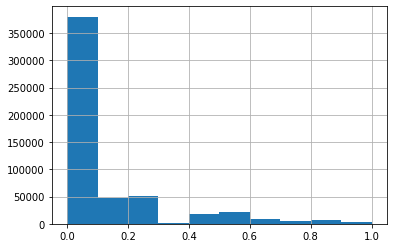

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [8]:
# Celda 1
vect_uno = CountVectorizer(dtype = np.int8, stop_words = {'english'}, max_features=100)
x_train_uno = vect_uno.fit_transform(X_train)
temp_uno = x_train_uno.todense()
temp_uno

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [2, 0, 0, ..., 0, 1, 0]], dtype=int8)

In [9]:
from sklearn.ensemble import RandomForestRegressor

modelo_uno = RandomForestRegressor(max_depth= 10, n_estimators=10, max_features = 30)
modelo_uno.fit(x_train_uno, y_train)



RandomForestRegressor(max_depth=10, max_features=30, n_estimators=10)

In [10]:
x_test_uno = vect_uno.transform(X_test)
y_pred_uno = modelo_uno.predict(x_test_uno)

In [24]:
from sklearn.metrics import mean_squared_error
mse_modelo_uno = mean_squared_error(y_test, y_pred_uno).round(6)
mse_modelo_uno

0.037883

#### Aclaraciones

Por temas de performance, se han quitado las stopwords al momento de aplicar CountVectorizer, además de escoger solamente un máximo de variables de 100

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 2
vect_dos = CountVectorizer(dtype = np.int8, stop_words = {'english'}, max_features=100, ngram_range = (3,3))
x_train_dos = vect_dos.fit_transform(X_train)
temp_dos = x_train_dos.todense()
temp_dos

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [13]:
modelo_dos = RandomForestRegressor(max_depth= 10, n_estimators=10, max_features = 30)
modelo_dos.fit(x_train_dos, y_train)

RandomForestRegressor(max_depth=10, max_features=30, n_estimators=10)

In [14]:
x_test_dos = vect_dos.transform(X_test)
y_pred_dos = modelo_dos.predict(x_test_dos)

In [25]:
mse_modelo_dos = mean_squared_error(y_test, y_pred_dos).round(6)
mse_modelo_dos

0.038948

#### Aclaraciones

Por temas de performance, se han quitado las stopwords al momento de aplicar CountVectorizer, además de escoger solamente un máximo de variables de 100

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.


Esta función permite mejorar la tokenización a través de la normalización de las frecuencias haciendo uso de tf-idf, que permite ponderar las observaciones para eliminar el impacto de aquellas palabras que tienen una gran ocurrencia en los textos pero que, empíricamente, son menos informativas que aquellas palabras que tienen menos ocurrencia en un texto. Esto permite evitar ruido en la recolección de datos por palabras que son bastante comunes pero que no son muy significativas al momento de tratar de entender un texto, es decir, se trata de solucionar un problema que se hace presente con CountVectorizer: considerar a todos los términos igualmente relevantes.

La técnica TfidfVectorizer utiliza la ponderación Tf-idf. La ponderación idf se calcula de la siguiente manera: 

**idf = log (N / dft)**

donde N es el número total de tokens en el texto y dft es la frecuencia absoluta de determinado token. Esta ponderación permite que un término raro tenga una mayor ponderación mientras que un término muy común que está muchas veces en el texto, tenga una menor ponderación. Esto asegura que los textos raros que contribuyen al entendimiento del texto estén mejor representados.

La técnica Tfidf es la combinación de la ponderación idf y la frecuencia absoluta. Esta ponderación permite asignar un peso al término t de acuerdo a la siguiente fórmula:

**tf - idf = tf x idf**

Esta ponderación asegura que el término tenga una ponderación mayor cuando el término tiene ocurrencia en un menor número de documentos (o partes de texto) mientras que tendrá una ponderación menor si el término ocurre pocas veces en un solo documento o ocurre en varios documentos, o si ocurre en prácticamente en casi todas las partes del texto.

Como ventajas, esta ponderación permite asignarle un valor mucho más realista a cada token de acuerdo a su ocurrencia e impacto en el texto. Esto permitirá, como veremos en este ejercicio, que haya mejores predicciones.




## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [18]:
# Celda 4
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(dtype = np.int8, max_features= 100)
x_train_cuatro = vectorizer.fit_transform(X_train)



In [19]:
modelo_cuatro = RandomForestRegressor(max_depth= 10, n_estimators=10, max_features = 30)
modelo_cuatro.fit(x_train_cuatro, y_train)

RandomForestRegressor(max_depth=10, max_features=30, n_estimators=10)

In [21]:
x_test_cuatro = vectorizer.transform(X_test)
y_pred_cuatro = modelo_cuatro.predict(x_test_cuatro)

In [23]:
mse_modelo_cuatro = mean_squared_error(y_test, y_pred_cuatro).round(6)
mse_modelo_cuatro

0.037782

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

Text(0.5, 1.0, 'Comparativa MSE - diferentes modelos')

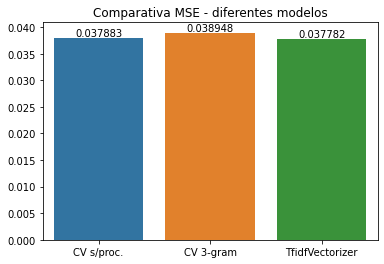

In [29]:
# Celda 5

import seaborn as sns
import matplotlib.pyplot as plt

modelos = ['CV s/proc.', 'CV 3-gram', 'TfidfVectorizer']
mse_modelos = [mse_modelo_uno, mse_modelo_dos, mse_modelo_cuatro]

ax = sns.barplot(modelos, mse_modelos)
ax.bar_label(ax.containers[0])
plt.title('Comparativa MSE - diferentes modelos')


#### Conclusiones

Con respecto a los resultados finales, se puede ver que el que tuvo un peor desempeño es el que ha usado CountVectorizer con 3-Gram. Con respecto a las demás transformaciones, se puede observar que TFidfVectorizer ha mostrado el mejor desempeño entre los tres modelos, lo que implica que la técnica de ponderación Tf-idf sirve para darle una mayor ponderación a aquellos tokens que de verdad son relevantes en el texto, por encima de solamente considerar la frecuencia absoluta, como es el caso de CountVectorizer sin ninguna transformación.